

---



---


### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



---


### Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
# zip = ZipFile('drive/My Drive/Colab Notebooks/Leaves.zip', 'r')
# zip.extractall('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/Unzip_Leaves')
# zip.close()

In [4]:
# path name
dir = '/content/drive/MyDrive/Colab Notebooks/Plant Leaves/Unzip_Leaves'

# categories of flowers
categories = ['Anhui Barberry', "Beale's Barberry", 'Big-fruited Holly', 
              'Camphortree', 'Canadian Poplar', 'Castor Aralia', 
              'Chinese Cinnamon', 'Chinese horse chestnut', 'Chinese redbud', 
              'Chinese Toon', 'Chinese Tulip Tree', 'Crape myrtle', 'Deodar', 
              'Ford Woodlotus', 'Glossy Privet', 'Goldenrain Tree', 
              'Japan Arrowwood', 'Japanese Cheesewood', 'Japanese Flowering Cherry',
              'Japanese maple', 'Maidenhair Tree', 'Nanmu', 'Oleander', 'Peach',
              'Pubescent Bamboo', 'Southern Magnolia', 'Sweet Osmanthus', 'Tangerine',
              'Trident Maple', 'True Indigo', 'Wintersweet', 'Yew Plum Pine']

# categories = categories[:5]

In [5]:
image_width = 224
image_height = 224
image_size = (image_width,image_height)

def make_data():
  train=[]
  test=[]
  data=[]
  for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    print(path)
    # data = []
    for img in os.listdir(path):
      img_path = os.path.join(path,img)
      
      try:
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, image_size)

        image = np.array(image, dtype=np.float64)

        data.append([image, label])
      except:
        pass
    # np.random.shuffle(data)
    # train.extend(data[:int(len(data)*0.7)])
    # test.extend(data[int(len(data)*0.7):])

    # items.append(len(os.listdir(path)))

  pik = open('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/data.pickle', 'wb')
  pickle.dump(data, pik)
  pik.close()  

  # pik = open('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/train_data.pickle', 'wb')
  # pickle.dump(train, pik)
  # pik = open('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/test_data.pickle', 'wb')
  # pickle.dump(test, pik)
  # pik.close()

# make_data()

In [6]:
def load_data(direc):
  pick = open(direc, 'rb')
  data = pickle.load(pick)
  pick.close()
  
  np.random.shuffle(data)
  
  feature = []
  labels = []

  for img,label in data:
    feature.append(img)
    labels.append(label)

  feature = np.array(feature, dtype=np.float64)
  labels = np.array(labels)

  feature /= 255.0

  return [feature, labels]

In [7]:
# (x_train, y_train) = load_data('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/train_data.pickle')
# (x_test, y_test) = load_data('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/test_data.pickle')

(feature, labels) = load_data('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/data.pickle')

In [8]:
(x_train, x_test, y_train, y_test) = train_test_split(feature, labels, test_size=0.2)

In [9]:
datagen = ImageDataGenerator(
        # rotation_range = 30,
        # shear_range = 0.2,
        # zoom_range = 0.2,
        # height_shift_range = 0.2,
        # width_shift_range = 0.2,
        # fill_mode = "nearest",
        # rescale=1./255,
        horizontal_flip = True,
        vertical_flip = True)
        # brightness_range = (0.5, 1.5))

In [10]:
batch_size=32

it = datagen.flow(x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1), y_train, batch_size=batch_size)
# # it = datagen.flow(feature.reshape(feature.shape[0], feature.shape[1], feature.shape[2], 1), labels, batch_size=20)

In [21]:
input_layer = tf.keras.Input([image_width, image_height,1])

conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='Same', 
                                 activation='relu')(input_layer)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                               activation='relu')(input_layer)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same',
                               activation='relu')(pool2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), padding='Same',
                               activation='relu')(pool3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)  

# conv5 = tf.keras.layers.Conv2D(filters=160, kernel_size=(2,2), padding='Same',
#                                activation='relu')(pool4)

# pool5 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv5)

# conv6 = tf.keras.layers.Conv2D(filters=192, kernel_size=(2,2), padding='Same',
#                                activation='relu')(pool5)

# pool6 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv6)

flt1 = tf.keras.layers.Flatten()(pool4)

dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1)

drop4 = tf.keras.layers.Dropout(0.4)(dn1)

dn2 = tf.keras.layers.Dense(512,activation='relu')(drop4)

drop5 = tf.keras.layers.Dropout(0.4)(dn2)

out = tf.keras.layers.Dense(32, activation='softmax')(drop5)

In [22]:
model = tf.keras.Model(input_layer, out)

In [23]:
# model.summary()

In [24]:
# from keras.applications.vgg19 import VGG19
# base_model = VGG19(input_shape = (x_train.shape[1], x_train.shape[2], 1), include_top=False, weights=None)
# for layer in base_model.layers:
#   layer.trainable = False

In [25]:
# x = tf.keras.layers.Flatten()(base_model.output)
# x = tf.keras.layers.Dense(4096, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(4096, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# predictions = tf.keras.layers.Dense(32, activation='softmax')(x)

In [26]:
# model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

In [27]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
earlystopping = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights=False)

# mcp_save = ModelCheckpoint(
#     '/content/mdl_wts.hdf5', 
#     save_best_only=True, 
#     monitor='loss', 
#     mode='min')

rlrop = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=2)

In [29]:
history = model.fit(it,#x_train, y_train,
          steps_per_epoch=len(x_train) // batch_size,
          epochs=100, 
          validation_data=(x_test,y_test),
          callbacks=[earlystopping, rlrop]) # mcp_save,

Epoch 1/100
47/47 [==============================] - 13s 266ms/step - loss: 3.5116 - accuracy: 0.0432 - val_loss: 3.2966 - val_accuracy: 0.1414 - lr: 0.0010
Epoch 2/100
47/47 [==============================] - 12s 259ms/step - loss: 2.9021 - accuracy: 0.1896 - val_loss: 2.1165 - val_accuracy: 0.4188 - lr: 0.0010
Epoch 3/100
47/47 [==============================] - 12s 258ms/step - loss: 1.9781 - accuracy: 0.3912 - val_loss: 1.4281 - val_accuracy: 0.5419 - lr: 0.0010
Epoch 4/100
47/47 [==============================] - 12s 259ms/step - loss: 1.5842 - accuracy: 0.4796 - val_loss: 1.2774 - val_accuracy: 0.5969 - lr: 0.0010
Epoch 5/100
47/47 [==============================] - 12s 259ms/step - loss: 1.3850 - accuracy: 0.5459 - val_loss: 1.0011 - val_accuracy: 0.6414 - lr: 0.0010
Epoch 6/100
47/47 [==============================] - 12s 266ms/step - loss: 1.1533 - accuracy: 0.6309 - val_loss: 0.8292 - val_accuracy: 0.7487 - lr: 0.0010
Epoch 7/100
47/47 [==============================] - 12s 2

In [ ]:
# from keras.models import load_model
# model1 = load_model('/content/mdl_wts.hdf5')

In [ ]:
# history.history.keys()

In [30]:
model.evaluate(x_train, y_train,verbose=1)

48/48 [==============================] - 4s 89ms/step - loss: 0.0507 - accuracy: 0.9902


[0.05069911852478981, 0.9901639223098755]

In [31]:
model.evaluate(x_test, y_test,verbose=1)

12/12 [==============================] - 1s 85ms/step - loss: 0.2896 - accuracy: 0.9319


[0.28958073258399963, 0.9319371581077576]

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/chinese_tulip'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, image_size)

image = np.array(image, dtype=np.float64)
image/=255.0

np.expand_dims(image, axis=0)

predict = model.predict(np.array([image]))

print(categories[np.argmax(predict)])

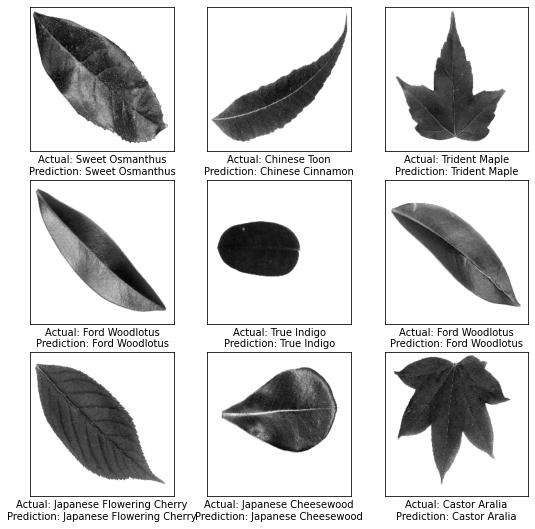

In [33]:
predict = model.predict(x_test)

plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.xlabel("Actual: "+categories[y_test[i]]+"\nPrediction: "+
    categories[np.argmax(predict[i])])
  plt.xticks([])
  plt.yticks([])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("drive/My Drive/Colab Notebooks/model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpr1ln4svy/assets


INFO:tensorflow:Assets written to: /tmp/tmpr1ln4svy/assets


154811916

In [34]:
model.save('drive/My Drive/Colab Notebooks/model2.h5')